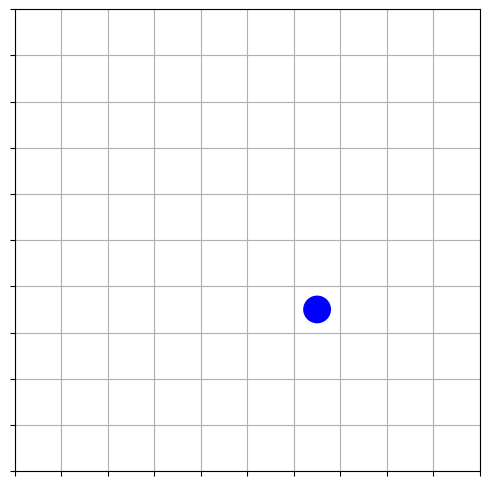

Cleaning complete in 51 steps.


In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import time
from IPython.display import clear_output

# Grid size
ROWS, COLS = 10, 10

# Initialize dirt grid (1 = dirt, 0 = clean)
np.random.seed(42)
dirt_grid = (np.random.rand(ROWS, COLS) < 0.2).astype(int)

# Agent starts in the center
agent_pos = [5, 5]

def is_valid(r, c):
    return 0 <= r < ROWS and 0 <= c < COLS

def find_nearest_dirt():
    from collections import deque
    visited = np.zeros((ROWS, COLS), dtype=bool)
    queue = deque()
    parent = {}

    start = (agent_pos[0], agent_pos[1])
    queue.append(start)
    visited[start[0], start[1]] = True

    while queue:
        r, c = queue.popleft()
        if dirt_grid[r, c] == 1:
            # Backtrack to find the first step
            while parent.get((r, c)) != start:
                r, c = parent[(r, c)]
            return [(r, c)]  # Return only next step
        for dr, dc in [(-1,0), (1,0), (0,-1), (0,1)]:
            nr, nc = r + dr, c + dc
            if is_valid(nr, nc) and not visited[nr, nc]:
                visited[nr, nc] = True
                queue.append((nr, nc))
                parent[(nr, nc)] = (r, c)

    return None  # No dirt found

def draw_grid():
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_xlim(0, COLS)
    ax.set_ylim(0, ROWS)
    ax.set_xticks(np.arange(0, COLS+1, 1))
    ax.set_yticks(np.arange(0, ROWS+1, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)

    # Draw dirt
    for r in range(ROWS):
        for c in range(COLS):
            if dirt_grid[r, c] == 1:
                rect = patches.Rectangle((c, ROWS - r - 1), 1, 1, facecolor='saddlebrown')
                ax.add_patch(rect)

    # Draw agent
    ar, ac = agent_pos
    circ = patches.Circle((ac + 0.5, ROWS - ar - 0.5), 0.3, facecolor='blue')
    ax.add_patch(circ)

    plt.show()

# Simulation loop
steps = 0
max_steps = 100

while steps < max_steps and np.any(dirt_grid == 1):
    clear_output(wait=True)
    draw_grid()
    time.sleep(0.3)
    r, c = agent_pos
    cleaned = False

    # Check adjacent cells
    for dr in [-1, 0, 1]:
        for dc in [-1, 0, 1]:
            if dr == 0 and dc == 0:
                continue
            nr, nc = r + dr, c + dc
            if is_valid(nr, nc) and dirt_grid[nr, nc] == 1:
                agent_pos = [nr, nc]
                dirt_grid[nr, nc] = 0
                cleaned = True
                break
        if cleaned:
            break

    # If no adjacent dirt, go to nearest
    if not cleaned:
        path = find_nearest_dirt()
        if path and len(path) > 0:
            next_step = path[0]
            agent_pos = list(next_step)

    steps += 1

# Final state
clear_output(wait=True)
draw_grid()
print("Cleaning complete in", steps, "steps.")
